In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense , LSTM

In [2]:
df = pd.read_csv('BTC-USD.csv')


In [3]:
df.shape

(2713, 7)

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [5]:
closed = df[['Date','Close']]

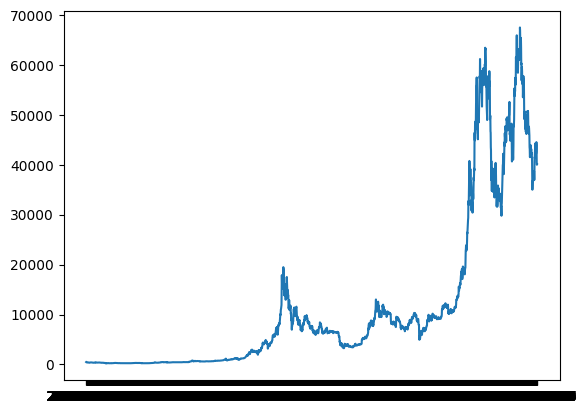

In [6]:
plt.close()
plt.plot(closed['Date'],closed['Close'])

In [7]:
price_2021 = closed[closed['Date'] >= '2021-01-01']

price_2021

,Date,Close
2298,2021-01-01,29374.152344
2299,2021-01-02,32127.267578
2300,2021-01-03,32782.023438
2301,2021-01-04,31971.914063
2302,2021-01-05,33992.429688
...,...,...
2708,2022-02-15,44575.203125
2709,2022-02-16,43961.859375
2710,2022-02-17,40538.011719
2711,2022-02-18,40030.976563


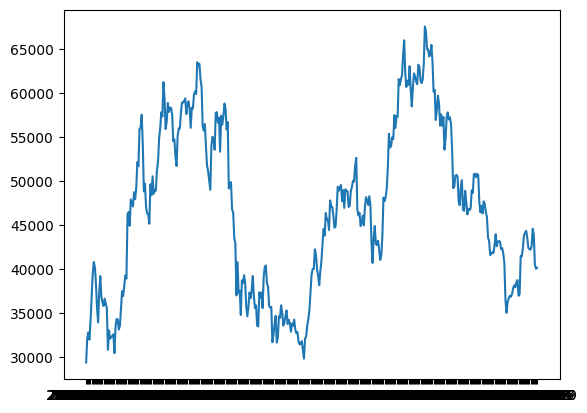

In [8]:
plt.close()
plt.plot(price_2021['Date'],price_2021['Close'])

In [9]:
x=price_2021['Close']
print(x[:5])

2298    29374.152344
2299    32127.267578
2300    32782.023438
2301    31971.914063
2302    33992.429688
Name: Close, dtype: float64


In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(np.array(x).reshape(-1,1))

In [11]:
x
x.shape

(415, 1)

In [12]:
x_train = x[0:332]
x_test = x[332:]

In [13]:
x_train.shape

(332, 1)

In [14]:
x_test.shape

(83, 1)

In [19]:
x1=[]
y1=[]
a=[]
b=0


for i in range(len(x_train)-10-1):
    a=x_train[i:i+10,0]
    b=x_train[i+10,0]
    x1.append(a)
    y1.append(b)

x_train1 = np.array(x1)
y_train1 = np.array(y1)

print(x1,y1)


x1=[]
y1=[]
a=[]
b=0


for i in range(len(x_test)-10-1):
    a=x_test[i:i+10,0]
    b=x_test[i+10,0]
    x1.append(a)
    y1.append(b)

x_test1 = np.array(x1)
y_test1 = np.array(y1)

print(x1,y1)
print(x_test1.shape)
print(x_train1.shape)

[array([0.        , 0.0720849 , 0.08922839, 0.06801727, 0.1209205 ,
       0.1950691 , 0.26174889, 0.29910073, 0.2848817 , 0.23518355]), array([0.0720849 , 0.08922839, 0.06801727, 0.1209205 , 0.1950691 ,
       0.26174889, 0.29910073, 0.2848817 , 0.23518355, 0.16213852]), array([0.08922839, 0.06801727, 0.1209205 , 0.1950691 , 0.26174889,
       0.29910073, 0.2848817 , 0.23518355, 0.16213852, 0.11910159]), array([0.06801727, 0.1209205 , 0.1950691 , 0.26174889, 0.29910073,
       0.2848817 , 0.23518355, 0.16213852, 0.11910159, 0.20795105]), array([0.1209205 , 0.1950691 , 0.26174889, 0.29910073, 0.2848817 ,
       0.23518355, 0.16213852, 0.11910159, 0.20795105, 0.25693868]), array([0.1950691 , 0.26174889, 0.29910073, 0.2848817 , 0.23518355,
       0.16213852, 0.11910159, 0.20795105, 0.25693868, 0.19509539]), array([0.26174889, 0.29910073, 0.2848817 , 0.23518355, 0.16213852,
       0.11910159, 0.20795105, 0.25693868, 0.19509539, 0.17814903]), array([0.29910073, 0.2848817 , 0.23518355, 0.16

In [20]:
x_test1.shape

(72, 10)

In [21]:
x_train1 = x_train1.reshape(321,10,1)
x_test1 = x_test1.reshape(72,10,1)

In [22]:
model = Sequential()

model.add(LSTM(10 , activation='relu' , input_shape=(None , 1)))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam' , loss='mean_squared_error')


In [23]:
h = model.fit(x_train1 , y_train1,validation_data=(x_test1,y_test1),epochs=500,verbose=0)

In [24]:
tr_predict = model.predict(x_train1)
ts_predict = model.predict(x_test1)
tr_predict.shape , ts_predict.shape

3/3 [==============================] - 0s 455us/step


((321, 1), (72, 1))

In [25]:
tr_predict = scaler.inverse_transform(tr_predict)
ts_predict = scaler.inverse_transform(ts_predict)
original_ytrain = scaler.inverse_transform(y_train1.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test1.reshape(-1,1)) 

In [26]:
print('org:' , original_ytest[20])
print('pred:' , ts_predict[20])

org: [46444.710938]
pred: [47962.926]


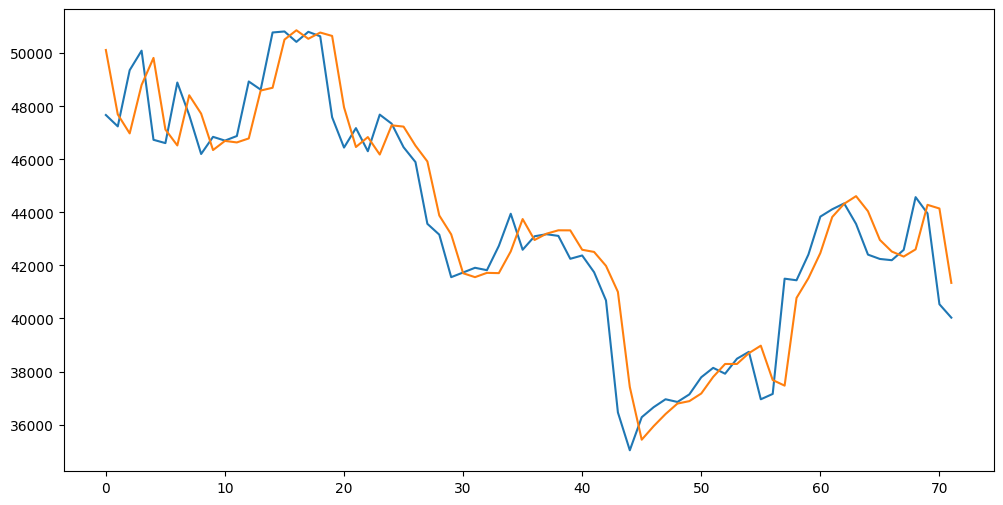

In [27]:
plt.close()
plt.figure(1,(12,6))
plt.plot(original_ytest)
plt.plot(ts_predict)

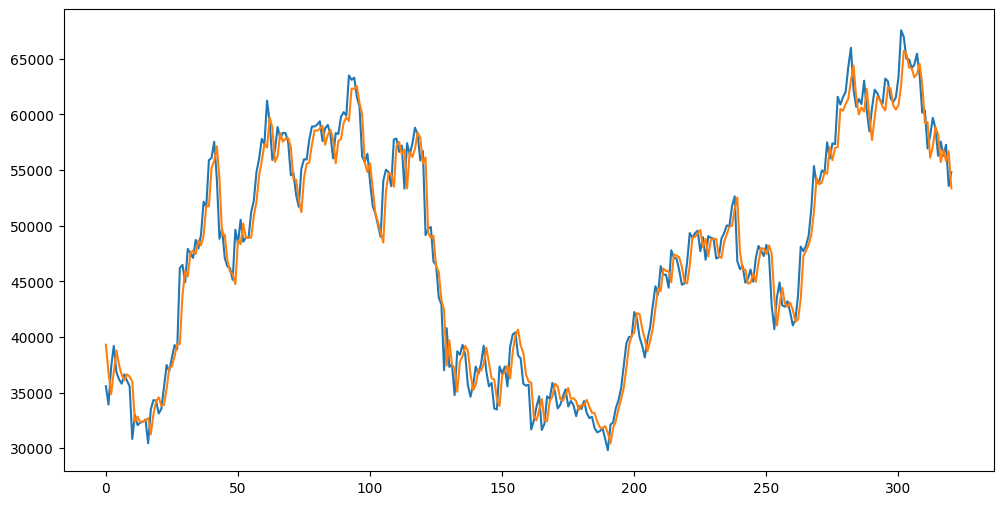

In [28]:
plt.close()


plt.figure(1,(12,6))


plt.plot(original_ytrain)

plt.plot(tr_predict)

plt.show()